In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [2]:
#Reading The Data File
PATH_TO_DATA = 'madaline.csv'
df = pd.read_csv(PATH_TO_DATA)
#a = Data.to_numpy()
Data=df.values
#Data

In [3]:
x_train = Data[:,:2]
x1_train = Data[:,0]
x2_train = Data[:,1]

#changed This part for better handling
y1_train = Data[:,2]

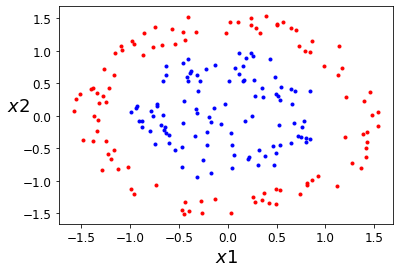

In [4]:
for i in range(len(y1_train)):
    #plt.figure()
    #plt.ion()
    if y1_train[i]==0:
        plt.plot(x1_train[i], x2_train[i], "b.")
    else: 
        plt.plot(x1_train[i], x2_train[i], "r.")
    plt.xlabel("$x1$", fontsize=18)
    plt.ylabel("$x2$", rotation=0, fontsize=18)
    #plt.grid()
    
plt.show()

In [5]:
alpha=0.2 #change
n=4 #change this part 4 6 or 8   IMPORTAAAANT

#Initialization
w_curr=np.random.random((2,n))
b_curr=np.random.random((n,1))
# w_curr=np.zeros((2,n))
# b_curr=np.zeros((n,1))
                       
b_next=np.zeros((n,1)) #changed
w_next=np.zeros((2,n))


epoch=0
flag=1      
#h=np.zeros(n)
z_out=np.zeros(n)
z_in=np.zeros(n)
# while(epoch!=10 or flag==1):
#while(flag==1 and epoch<=50):
while(epoch!=800):
    for j in range(len(y1_train)):
        for i in range(n):
            z_in[i]=b_curr[i,0]+x1_train[j]*w_curr[0,i] + x2_train[j]*w_curr[1,i]
            if (z_in[i] >= 0 ):  
                z_out[i] =1
            else:  
                z_out[i] = -1
        #OR Function
        y_in=np.sum(z_out)+3  #This line Does The OR
        #y_out=np.sign(y_in)
        if (y_in >= 0 ):  
            y_out =1
        else:  
            y_out = 0

        input_num=2
        #Step7
        if(y1_train[j]==y_out) :
            #print('ok')
            pass
        elif (y1_train[j]==1):
            ind=np.argmin(abs(z_in))
            for i in range(input_num):
                #Update
                b_next[ind]=b_curr[ind]+alpha*(1-z_in[ind])
                w_next[i,ind]=w_curr[i,ind]+alpha*(1-z_in[ind])*x_train[j,i]  #pay attention to this part
                #print(w_next)
        elif (y1_train[j]==0): 
            #print('no')
            for e in range(n):
                if(z_in[e]>0):
                    b_next[e]=b_curr[e]+alpha*(0-z_in[e])
                    w_next[1,e]=w_curr[1,e]+alpha*(0-z_in[e])*x_train[j,1]
                    w_next[0,e]=w_curr[0,e]+alpha*(0-z_in[e])*x_train[j,0]
        b_curr=b_next.copy()
        w_curr=w_next.copy()
        #print(w_curr)
        
    epoch=epoch+1  
    #print(epoch)



        
#         #Updating rules            
#         if (h[j]-z1_train[j]!=0):
#             w1_next=w1_curr+Alpha*(z1_train[j]-net)*x1_train[j]
#             w2_next=w2_curr+Alpha*(z1_train[j]-net)*x2_train[j]      
#             b_next=b_curr+Alpha*(z1_train[j]-net)
#             Error_weights=[w1_next-w1_curr,w2_next-w2_curr,b_next-b_curr ]
#             w1_curr=w1_next.copy()     
#             w2_curr=w2_next.copy() 
#             b_curr=b_next.copy()
#             if (abs(max(Error_weights))>=0.1):
#                 print(epoch,j)
# #                 w1_curr=w1_next.copy()   
# #                 w2_curr=w2_next.copy() 
# #                 b_curr=b_next.copy()  
#             else :
#                 flag=0
#                 break                
#    epoch=epoch+1
    #print(max(Error_weights))
# w1,w2,b=w1_next,w2_next,b_next
# w1,w2,b,max(Error_weights)
#w_next,b_curr,w_curr

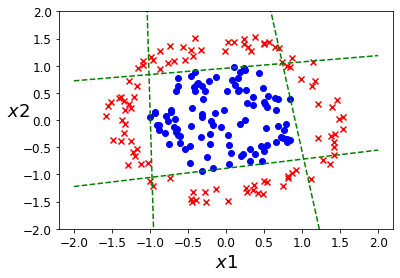

In [6]:
xx1=np.linspace(-2,2)
for k in range(n):
    w1=w_next[0,k]
    w2=w_next[1,k]
    b=b_curr[k]
    yy1=-(w1/w2) * xx1 -(b/w2)
    plt.plot(xx1, yy1, "g--")

#Plotting Dataa
for i in range(len(y1_train)):
    if y1_train[i]==1:
        plt.scatter(x1_train[i], x2_train[i],color='r',marker='x')
    else: 
        plt.scatter(x1_train[i], x2_train[i],color='b',marker='o')
plt.xlabel("$x1$", fontsize=18)
plt.ylabel("$x2$", rotation=0, fontsize=18)
plt.ylim([-2, 2])
plt.show()
